In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/sidiq/OneDrive/Desktop/GIT HUB PROJECTS/K-MEANS/ML-MODEL-K-MEANS/DATA/OnlineRetail.csv"

In [3]:
try:
    df = pd.read_csv(path, encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding='windows-1252')
        

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [5]:
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


### Data Cleaning And Data Preprocessing

In [6]:
df.duplicated().sum()

5268

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(536641, 8)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

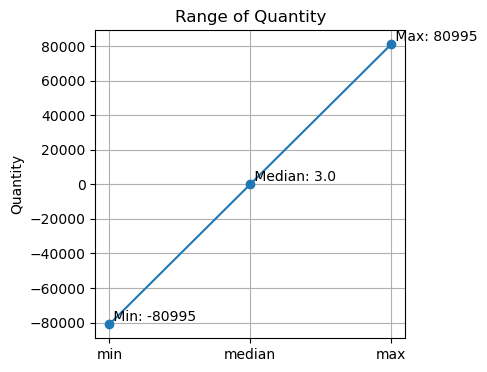

In [10]:
# Calculate minimum, maximum, and median values
min_quantity = df['Quantity'].min()
max_quantity = df['Quantity'].max()
median_quantity = df['Quantity'].median()

# Creating a simple range plot
plt.figure(figsize=(4,4))  # Set figure size
plt.plot(['min', 'median', 'max'], [min_quantity, median_quantity, max_quantity], marker='o')

# Adding annotations for clarity
plt.text('min', min_quantity, f' Min: {min_quantity}', verticalalignment='bottom')
plt.text('median', median_quantity, f' Median: {median_quantity}', verticalalignment='bottom')
plt.text('max', max_quantity, f' Max: {max_quantity}', verticalalignment='bottom')

plt.title('Range of Quantity')
plt.ylabel('Quantity')
plt.grid(True)  # Add grid for better readability
plt.show()

In [10]:
# Now remove raws with negative value in Quantity column 
df= df[df['Quantity'] >= 0]

In [12]:
df.shape

(526054, 8)

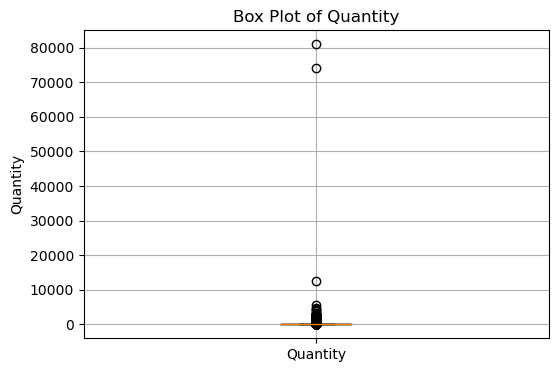

In [13]:
plt.figure(figsize=(6, 4))  # Optional: Specifies the figure size
plt.boxplot(df['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.xticks([1], ['Quantity'])  # Optional: Specifies the tick label on the x-axis
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.show()

In [11]:
df = df[df['Quantity'] < 10000]

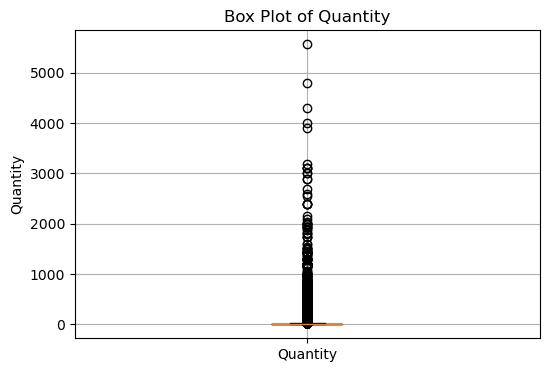

In [15]:
plt.figure(figsize=(6, 4))  # Optional: Specifies the figure size
plt.boxplot(df['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.xticks([1], ['Quantity'])  # Optional: Specifies the tick label on the x-axis
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.show()

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the outliers
outliers = df[(df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR))]

print("Outliers in the 'Quantity' column:")
outliers

Outliers in the 'Quantity' column:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France
44,536370,22492,MINI PAINT SET VINTAGE,36,01-12-2010 08:45,0.65,12583.0,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,01-12-2010 09:00,2.55,13748.0,United Kingdom
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,01-12-2010 09:09,10.95,15100.0,United Kingdom
...,...,...,...,...,...,...,...,...
541835,581579,23581,JUMBO BAG PAISLEY PARK,40,09-12-2011 12:19,1.79,17581.0,United Kingdom
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,09-12-2011 12:23,1.45,13777.0,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,09-12-2011 12:23,1.85,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,09-12-2011 12:25,0.72,13777.0,United Kingdom


In [14]:
# Filter the DataFrame to remove outliers
df = df[~((df['Quantity'] < (Q1 - 1.5 * IQR)) | (df['Quantity'] > (Q3 + 1.5 * IQR)))]

In [18]:
df.shape

(498699, 8)

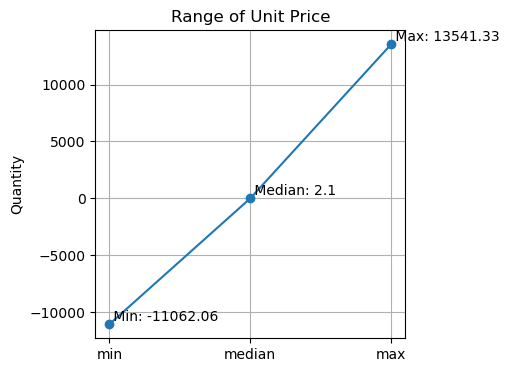

In [19]:
# Calculate minimum, maximum, and median values
min_quantity = df['UnitPrice'].min()
max_quantity = df['UnitPrice'].max()
median_quantity = df['UnitPrice'].median()

# Creating a simple range plot
plt.figure(figsize=(4,4))  # Set figure size
plt.plot(['min', 'median', 'max'], [min_quantity, median_quantity, max_quantity], marker='o')

# Adding annotations for clarity
plt.text('min', min_quantity, f' Min: {min_quantity}', verticalalignment='bottom')
plt.text('median', median_quantity, f' Median: {median_quantity}', verticalalignment='bottom')
plt.text('max', max_quantity, f' Max: {max_quantity}', verticalalignment='bottom')

plt.title('Range of Unit Price')
plt.ylabel('Quantity')
plt.grid(True)  # Add grid for better readability
plt.show()

In [20]:
df= df[df['UnitPrice'] >= 0]

In [21]:
df.shape

(498697, 8)

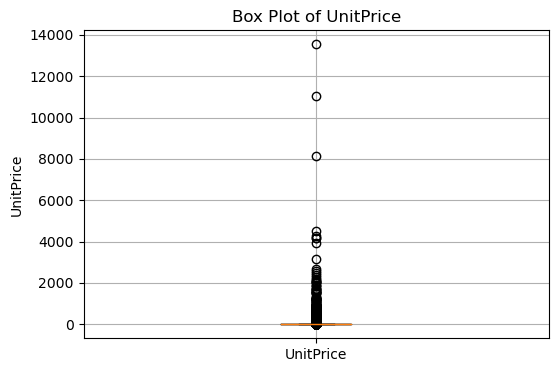

In [22]:
plt.figure(figsize=(6, 4))  # Optional: Specifies the figure size
plt.boxplot(df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.ylabel('UnitPrice')
plt.xticks([1], ['UnitPrice'])  # Optional: Specifies the tick label on the x-axis
plt.grid(True)  # Optional: Adds a grid for easier analysis
plt.show()

In [15]:
# Assuming df is your DataFrame
# Count the number of rows where Quantity is greater than 6000
num_rows_greater_than_3000 = (df['UnitPrice'] > 3000).sum()

print(f"Number of rows with UnitPrice > 3000: {num_rows_greater_than_3000}")

Number of rows with UnitPrice > 3000: 9


In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the outliers
outliers = df[(df['UnitPrice'] < (Q1 - 1.5 * IQR)) | (df['UnitPrice'] > (Q3 + 1.5 * IQR))]

In [17]:
# Filter the DataFrame to remove outliers
df = df[~((df['UnitPrice'] < (Q1 - 1.5 * IQR)) | (df['UnitPrice'] > (Q3 + 1.5 * IQR)))]

In [18]:
df.shape

(461181, 8)

In [19]:
X = df[['Quantity', 'UnitPrice']]

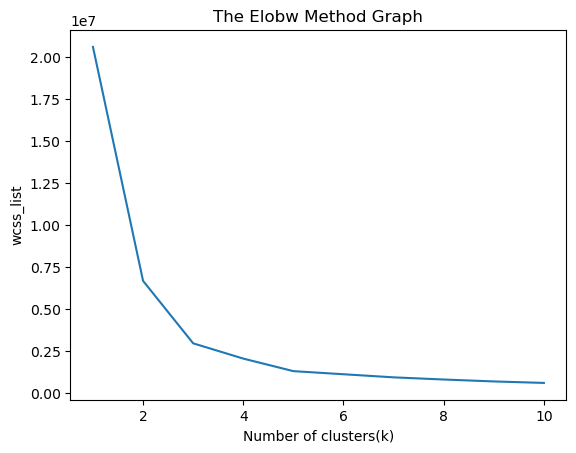

In [21]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [29]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

In [30]:
kmeans.fit(X)

# Assigning the cluster labels to your original DataFrame
df['Cluster'] = kmeans.labels_

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0


C:\Users\sidiq\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


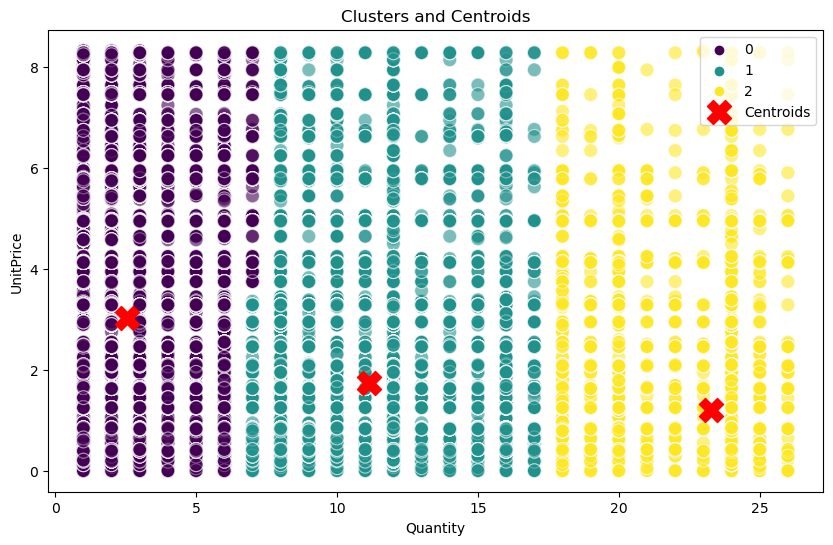

In [31]:
# Setting the plot size for better readability
plt.figure(figsize=(10, 6))

# Plotting the clusters
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters and Centroids')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

In [22]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 

In [23]:
kmeans.fit(X)

# Assigning the cluster labels to your original DataFrame
df['Cluster'] = kmeans.labels_

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0


C:\Users\sidiq\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


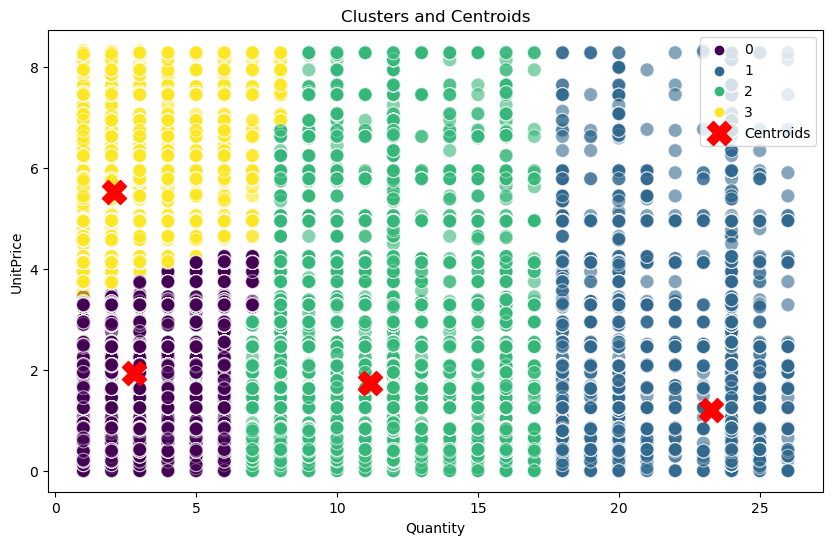

In [25]:
# Setting the plot size for better readability
plt.figure(figsize=(10, 6))

# Plotting the clusters
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters and Centroids')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

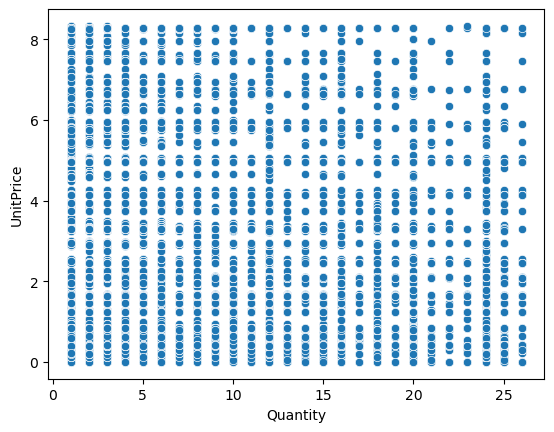

In [26]:
# Plotting the clusters
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)

In [32]:
try:
    df = pd.read_csv(path, encoding='latin1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(path, encoding='ISO-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding='windows-1252')
        

In [33]:
df.shape

(541909, 8)

In [34]:
df = df.drop_duplicates()

In [35]:
# Now remove raws with negative value in Quantity column 
df= df[df['Quantity'] > 0]

In [36]:
df = df[df['Quantity'] < 10000]

In [37]:
# Now remove raws with negative value in Quantity column 
df= df[df['UnitPrice'] > 0]
df = df[df['UnitPrice']<3000]

In [38]:
X = df[['Quantity', 'UnitPrice']]

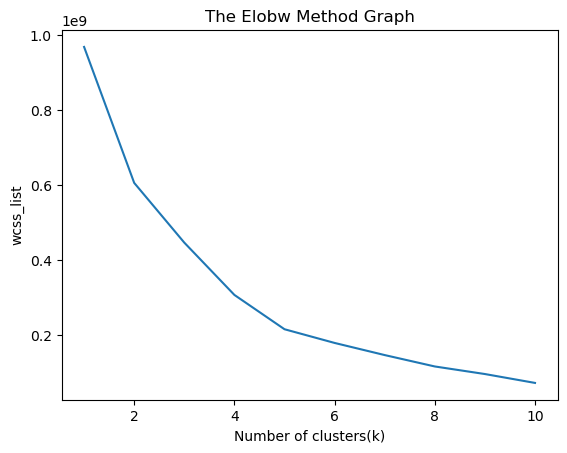

In [39]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [40]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)

In [41]:
kmeans.fit(X)

# Assigning the cluster labels to your original DataFrame
df['Cluster'] = kmeans.labels_

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,0


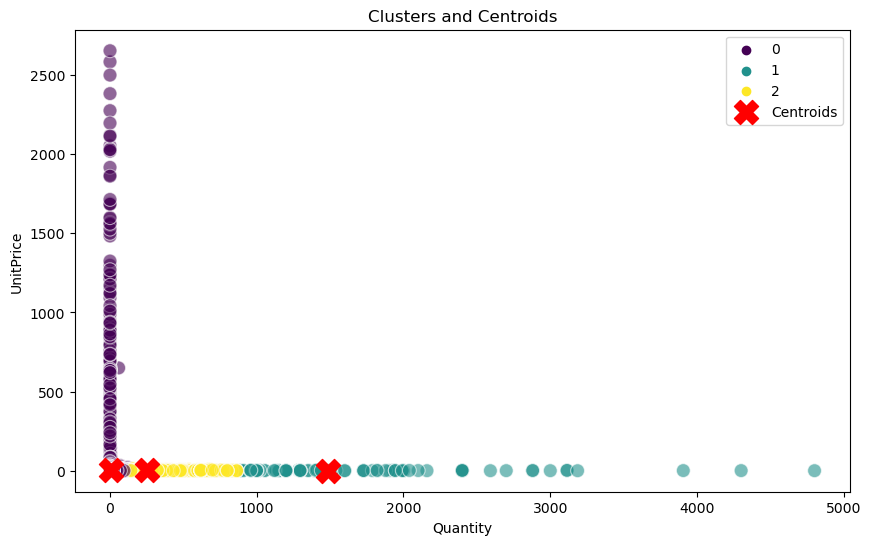

In [42]:
# Setting the plot size for better readability
plt.figure(figsize=(10, 6))

# Plotting the clusters
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, hue='Cluster', palette='viridis', s=100, alpha=0.6)

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

plt.title('Clusters and Centroids')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.show()